In [73]:
# AAOAK9.py
# UC Davis BIM110B 
# Winter 2023
# Group 5: Anisha Kumar, Jasmine Rose Muolic, Blanca Osorio, Marc Ramirez, Emely Rivera 
# Automattic Assessment of Osteoarthritis in Canine Elbows
# Marc's Version 1
import cv2
import pydicom as dicom
import numpy as np
# import matplotlib as mp
# plt = mp.pyplot
# imread, imshow, show, subplot, title, get_cmap, hist
import skimage
# https://scikit-image.org/docs/stable/api/skimage.filters.html
# use code below to show the image
# plt.imshow(insertImagePixelArrayHere,cmap=plt.cm.gray)
from matplotlib.pyplot import imread, imshow, show, subplot, title, hist, cm

In [74]:
# R1
path = r'/Users/marcramirez/Desktop/AAOAK9/Anonymous Rad Pt 2/R1/Elbow_Lf_Rf - 145421/Right_Fore_CR_CD_Extremity_10/IM-0003-0001.dcm'

original image


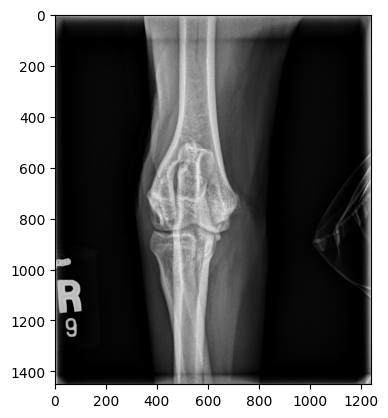

In [75]:
## pydicom
R1_RF_CRCD = dicom.dcmread(path)
pixelsR1_RF_CRCD = R1_RF_CRCD.pixel_array
m, n = np.shape(pixelsR1_RF_CRCD) # preset dimensions of the radiogrpah when opening them, will help to make code universal for
                                  # different sized radiograph inputs
print('original image')
imshow(pixelsR1_RF_CRCD,cmap=cm.gray)

In [76]:
# Intensity Thresholding
def intesityThresh(image,m,n,r2,r1=0): # image = pixels of the image
                                       # m = # of rows
                                       # n = # of columns
                                   # r2 = upper bound threshold
                                   # r1 = lower bound threshold, defaulted to 0 if no input
    thresh = image
    for i in range(0,m):
        for j in range (0,n):
            if image[i][j] >= r1 and image[i][j] <= r2:
                thresh[i][j] = 0
    return thresh
# Apply a filter N times
def applyNTimes(filt,image,n=1): # filt = filter used
                                 # image = pixels of the image
                                 # n = how many times to apply the filter
    index = 1
    medianImage = filt(image)
    while index < n:
        medianImage = filt(medianImage)
        index += 1
    return medianImage

In [77]:
#Intesity thresholding # works to eliminate lower threshold values but messes with the rest of the outputs at least on my computer
# Uncomment section bellow if you want to see what it would look like
# intThreshR1_RF_CRCD = intesityThresh(pixelsR1_RF_CRCD,m,n,500)
# imshow(intThreshR1_RF_CRCD, cmap = cm.gray)

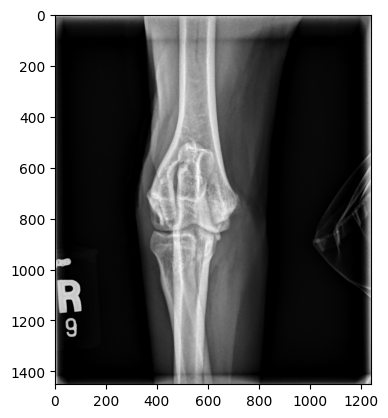

In [78]:
# Median Filter, does not do anything, takes 17.2 s with N = 100
medianR1_RF_CRCD = applyNTimes(skimage.filters.median,pixelsR1_RF_CRCD,10) # no real diffrence, maybe at the pixel level the intensity values
                                                           # chnage but overall same output
imshow(medianR1_RF_CRCD, cmap = cm.gray)

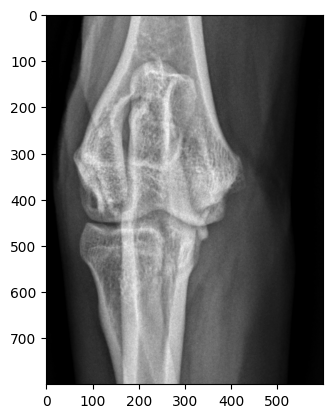

In [79]:
# Segmented Region
onlyBoneAndMuscle = pixelsR1_RF_CRCD[400:1200,300:900]
imshow(onlyBoneAndMuscle, cmap = cm.gray)

In [80]:
#Histogram Equalization with subplot, takes 16.7 s
histeqSegmentR1_RF_CRCD = skimage.exposure.equalize_hist(onlyBoneAndMuscle)

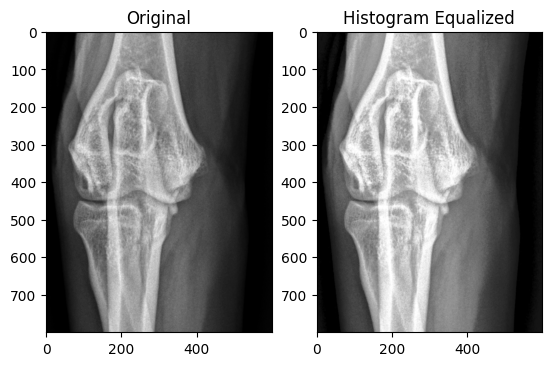

In [81]:
subplot(121); imshow(onlyBoneAndMuscle, cmap=cm.gray); title('Original')
subplot(122); imshow(histeqSegmentR1_RF_CRCD, cmap=cm.gray); title('Histogram Equalized')
show()

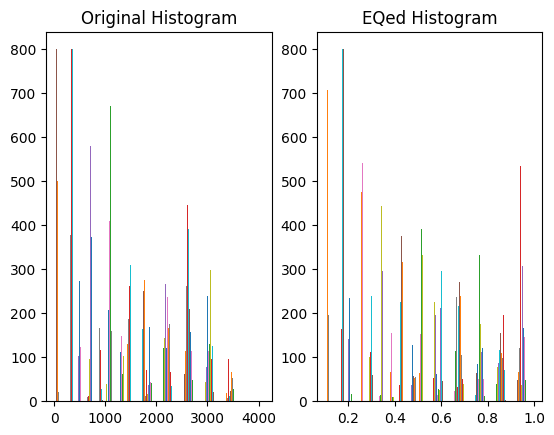

In [82]:
subplot(121); hist(onlyBoneAndMuscle); title('Original Histogram')
subplot(122); hist(histeqSegmentR1_RF_CRCD); title('EQed Histogram')
show()

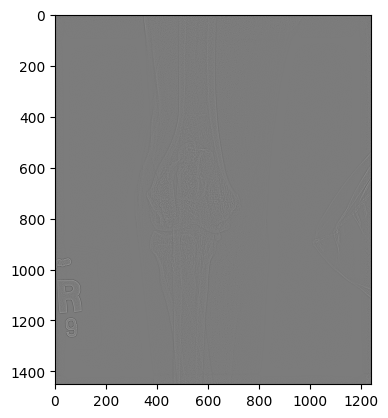

In [83]:
# Laplacian
laplacianR1_RF_CRCD = applyNTimes(skimage.filters.laplace,pixelsR1_RF_CRCD,1)
imshow(laplacianR1_RF_CRCD,cmap = cm.gray)
# on its own comes out blurry but what about intensity thresholding
# imshow(,cmap = cm.gray)

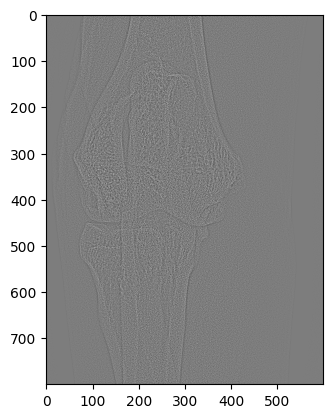

In [84]:
# Laplacian w/ of small segment
laplaSegmentR1_RF_CRCD = applyNTimes(skimage.filters.laplace,onlyBoneAndMuscle,1)
imshow(laplaSegmentR1_RF_CRCD,cmap = cm.gray)

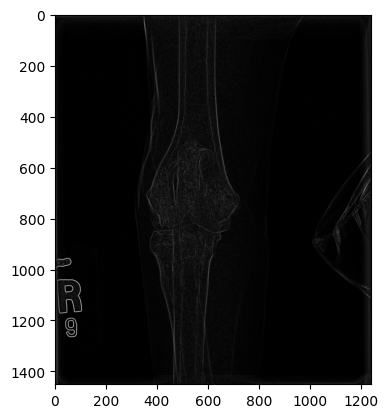

In [85]:
#Sobel Filter
edgesR1_RF_CRCD = skimage.filters.sobel(pixelsR1_RF_CRCD)
imshow(edgesR1_RF_CRCD,cmap=cm.gray) 

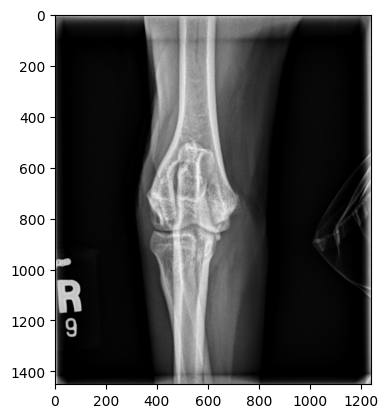

In [86]:
# Gaussian
gaussR1_RF_CRCD = skimage.filters.gaussian(pixelsR1_RF_CRCD,1)
imshow(gaussR1_RF_CRCD,cmap = cm.gray)

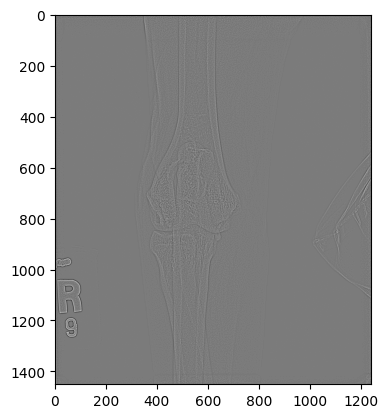

In [87]:
# hold on wiener, different for python
# Laplacian of Gaussian
loGR1_RF_CRCD = skimage.filters.laplace(gaussR1_RF_CRCD)
imshow(loGR1_RF_CRCD,cmap = cm.gray)

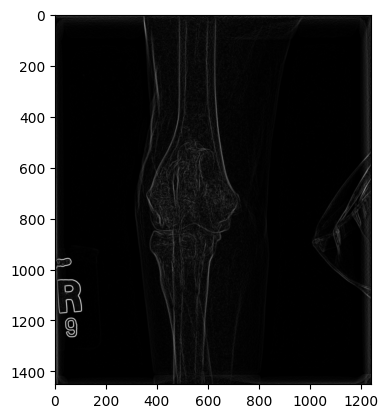

In [88]:
#SoG: Sobel of Gaussian
soGR1_RF_CRCD = skimage.filters.sobel(gaussR1_RF_CRCD)
imshow(soGR1_RF_CRCD,cmap = cm.gray)

Text(0.5, 1.0, 'Histeq Aft Butter')

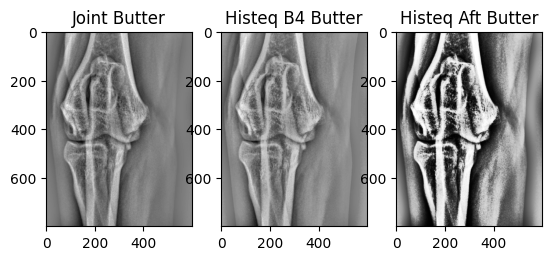

In [97]:
#Butterworth filter
cutoffFreqRatio = 0.005
highPass = True
orderType = 3.0
butterSegmentR1 = skimage.filters.butterworth(onlyBoneAndMuscle,cutoffFreqRatio,highPass,orderType)
butterHisteqB4SegmentR1 = skimage.filters.butterworth(histeqSegmentR1_RF_CRCD,cutoffFreqRatio,highPass,orderType)
subplot(1,3,1); imshow(butterSegmentR1, cmap = cm.gray); title('Joint Butter')
subplot(1,3,2); imshow(butterHisteqB4SegmentR1, cmap = cm.gray); title('Histeq B4 Butter')
subplot(1,3,3); imshow(skimage.exposure.equalize_hist(butterSegmentR1), cmap = cm.gray); title('Histeq Aft Butter')

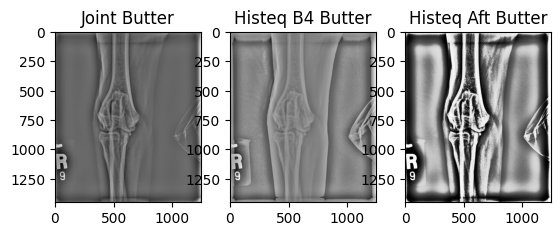

In [95]:
# Butter on all parts
butterAllR1 = skimage.filters.butterworth(pixelsR1_RF_CRCD,cutoffFreqRatio,highPass,orderType)
butterHisteqB4AllR1 = skimage.filters.butterworth(skimage.exposure.equalize_hist(pixelsR1_RF_CRCD),cutoffFreqRatio,highPass,orderType)
subplot(1,3,1); imshow(butterAllR1, cmap = cm.gray); title('Joint Butter')
subplot(1,3,2); imshow(butterHisteqB4AllR1, cmap = cm.gray); title('Histeq B4 Butter')
subplot(1,3,3); imshow(skimage.exposure.equalize_hist(butterAllR1), cmap = cm.gray); title('Histeq Aft Butter')
show()

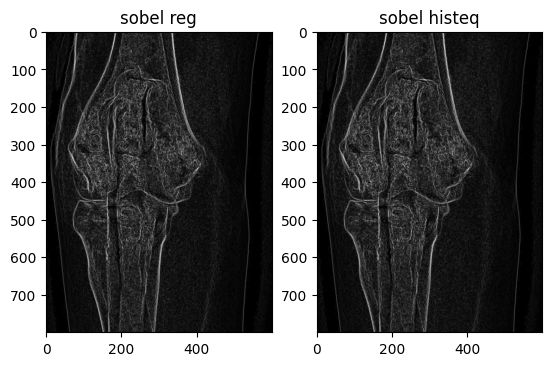

In [91]:
# now sobel on segment
sobelSegmentR1= skimage.filters.sobel(onlyBoneAndMuscle)
sobelSegmentR1= skimage.filters.sobel(histeqSegmentR1_RF_CRCD)
subplot(1,2,1); imshow(sobelSegmentR1,cmap = cm.gray); title('sobel reg')
subplot(1,2,2); imshow(sobelSegmentR1,cmap = cm.gray); title('sobel histeq')
show()

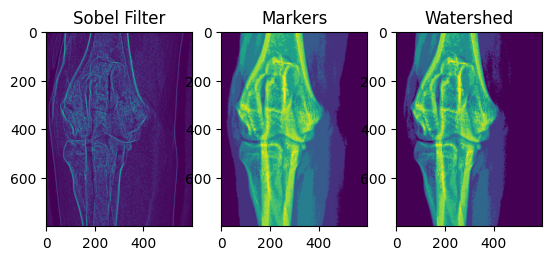

In [106]:
# Watershedding, not very accurate bc just 500 intensity step but may be helpful for later on
markers = np.zeros_like(onlyBoneAndMuscle) # creates an aray of zeros the same size as the array input
mSmall,nSmall = np.shape(onlyBoneAndMuscle)
for i in range(0,mSmall):
    for j in range(0,nSmall):
        if  onlyBoneAndMuscle[i][j] >= 500 and onlyBoneAndMuscle[i][j] <1000:
            markers[i][j] = 1 # outside blue
        elif onlyBoneAndMuscle[i][j] >=1000 and onlyBoneAndMuscle[i][j]<1500:
            markers[i][j] = 2 # in green
        elif onlyBoneAndMuscle[i][j] >=1500 and onlyBoneAndMuscle[i][j]<2000:
            markers[i][j] = 3 # inside yellow
        elif onlyBoneAndMuscle[i][j] >= 2000 and onlyBoneAndMuscle[i][j]<2500:
            markers[i][j] = 4
        elif onlyBoneAndMuscle[i][j] >= 2500 and onlyBoneAndMuscle[i][j]<3000:
            markers[i][j] = 5
        elif onlyBoneAndMuscle[i][j] >= 3000 and onlyBoneAndMuscle[i][j]<3500:
            markers[i][j] = 6
        elif onlyBoneAndMuscle[i][j] >= 3500:
            markers[i][j] = 7

watershedBone = skimage.segmentation.watershed(sobelSegmentR1,markers)
subplot(1,3,1); imshow(sobelSegmentR1); title('Sobel Filter')
subplot(1,3,2); imshow(markers); title('Markers')
subplot(1,3,3); imshow(watershedBone); title('Watershed')
show()

In [105]:
for i in onlyBoneAndMuscle:
    print('mean',np.mean(i),'max',max(i))

mean 1363.825 max 3530
mean 1359.11 max 3568
mean 1359.78 max 3595
mean 1355.8533333333332 max 3624
mean 1349.46 max 3599
mean 1347.635 max 3633
mean 1348.97 max 3594
mean 1350.2116666666666 max 3705
mean 1351.0833333333333 max 3672
mean 1347.445 max 3701
mean 1352.5583333333334 max 3832
mean 1357.2216666666666 max 3609
mean 1350.5416666666667 max 3504
mean 1353.5616666666667 max 3598
mean 1361.085 max 3709
mean 1364.7966666666666 max 3712
mean 1370.0316666666668 max 3692
mean 1370.54 max 3609
mean 1369.7216666666666 max 3642
mean 1367.045 max 3568
mean 1370.5233333333333 max 3622
mean 1368.4133333333334 max 3583
mean 1374.025 max 3609
mean 1375.9383333333333 max 3714
mean 1367.8183333333334 max 3677
mean 1369.1366666666668 max 3619
mean 1369.31 max 3518
mean 1371.4866666666667 max 3642
mean 1366.8533333333332 max 3683
mean 1359.6883333333333 max 3498
mean 1356.4633333333334 max 3604
mean 1359.325 max 3552
mean 1362.495 max 3547
mean 1366.665 max 3559
mean 1362.5183333333334 max 3499
m